In [1]:
#Libraries added
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt 

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 
sns.set(color_codes=True)

In [2]:
#The functions we will use in the future have been defined
def label_graph(ticksfont, x_label, y_label, title_label, fontsize):
    plt.xticks(fontsize=ticksfont)
    plt.yticks(fontsize=ticksfont)
    plt.xlabel(x_label, fontsize=fontsize)
    plt.ylabel(y_label, fontsize=fontsize)
    plt.title(title_label, fontsize=fontsize)
def median(array):
    median = np.median(array)
    return print("Median:", median)
def mean(array):
    mean = np.mean(array)
    return print("Mean:", mean)
def variance(array):
    variance = np.var(array)
    return print("Variance:", variance)

In [3]:
#The file to be processed is assigned to the variable
src = "residentialDwellingPropertyTransactions.csv"

In [4]:
#Dataframe created
firstDF = pd.read_csv(src)

In [5]:
#First 5 (default) lines viewed
firstDF.head()

,Statistic Label,Month,County,Dwelling Status,Stamp Duty Event,Type of Buyer,Type of Sale,UNIT,VALUE
0,Volume of Sales,2010 January,Carlow,New,Filings,Household Buyer - All,Market,Number,5.0
1,Volume of Sales,2010 January,Carlow,New,Filings,Household Buyer - All,Non-Market,Number,0.0
2,Volume of Sales,2010 January,Carlow,New,Filings,Household Buyer - First-Time Buyer Owner-Occupier,Market,Number,0.0
3,Volume of Sales,2010 January,Carlow,New,Filings,Household Buyer - First-Time Buyer Owner-Occupier,Non-Market,Number,0.0
4,Volume of Sales,2010 January,Carlow,New,Filings,Household Buyer - Former Owner-Occupier,Market,Number,3.0


In [6]:
#Last 5 (default) lines viewed
firstDF.tail()

,Statistic Label,Month,County,Dwelling Status,Stamp Duty Event,Type of Buyer,Type of Sale,UNIT,VALUE
682235,Median Price,2023 August,Monaghan,Existing,Executions,Household Buyer - Former Owner-Occupier,Non-Market,Euro,165000.0
682236,Median Price,2023 August,Monaghan,Existing,Executions,Household Buyer - Non-Occupier,Market,Euro,NaN
682237,Median Price,2023 August,Monaghan,Existing,Executions,Household Buyer - Non-Occupier,Non-Market,Euro,35000.0
682238,Median Price,2023 August,Monaghan,Existing,Executions,Non-Household Buyer,Market,Euro,39750.0
682239,Median Price,2023 August,Monaghan,Existing,Executions,Non-Household Buyer,Non-Market,Euro,NaN


In [7]:
#The names of some columns have been changed
newNames =  {"UNIT": "Unit", "VALUE": "Value"}
firstDF.rename(columns=newNames, inplace=True)

In [8]:
#To provide clearer data, division was made in the months column
firstDF[["Year", "Month"]] = firstDF.Month.str.split(" ", expand=True)

In [9]:
#First 5 lines viewed
firstDF.head(5)

,Statistic Label,Month,County,Dwelling Status,Stamp Duty Event,Type of Buyer,Type of Sale,Unit,Value,Year
0,Volume of Sales,January,Carlow,New,Filings,Household Buyer - All,Market,Number,5.0,2010
1,Volume of Sales,January,Carlow,New,Filings,Household Buyer - All,Non-Market,Number,0.0,2010
2,Volume of Sales,January,Carlow,New,Filings,Household Buyer - First-Time Buyer Owner-Occupier,Market,Number,0.0,2010
3,Volume of Sales,January,Carlow,New,Filings,Household Buyer - First-Time Buyer Owner-Occupier,Non-Market,Number,0.0,2010
4,Volume of Sales,January,Carlow,New,Filings,Household Buyer - Former Owner-Occupier,Market,Number,3.0,2010


In [10]:
#Total number of columns and rows were checked
firstDF.shape

(682240, 10)

In [11]:
#The names of the columns were learned
firstDF.columns

Index(['Statistic Label', 'Month', 'County', 'Dwelling Status',
       'Stamp Duty Event', 'Type of Buyer', 'Type of Sale', 'Unit', 'Value',
       'Year'],
      dtype='object')

In [12]:
#Data types of columns were learned
firstDF.dtypes

Statistic Label      object
Month                object
County               object
Dwelling Status      object
Stamp Duty Event     object
Type of Buyer        object
Type of Sale         object
Unit                 object
Value               float64
Year                 object
dtype: object

In [13]:
#The number of elements in the columns was learned
firstDF.count()

Statistic Label     682240
Month               682240
County              682240
Dwelling Status     682240
Stamp Duty Event    682240
Type of Buyer       682240
Type of Sale        682240
Unit                682240
Value               580400
Year                682240
dtype: int64

In [14]:
#More detailed information was received about the columns
firstDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682240 entries, 0 to 682239
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Statistic Label   682240 non-null  object 
 1   Month             682240 non-null  object 
 2   County            682240 non-null  object 
 3   Dwelling Status   682240 non-null  object 
 4   Stamp Duty Event  682240 non-null  object 
 5   Type of Buyer     682240 non-null  object 
 6   Type of Sale      682240 non-null  object 
 7   Unit              682240 non-null  object 
 8   Value             580400 non-null  float64
 9   Year              682240 non-null  object 
dtypes: float64(1), object(9)
memory usage: 52.1+ MB


In [15]:
#Rows containing null values were detected
firstDF.isnull().sum()

Statistic Label          0
Month                    0
County                   0
Dwelling Status          0
Stamp Duty Event         0
Type of Buyer            0
Type of Sale             0
Unit                     0
Value               101840
Year                     0
dtype: int64

In [16]:
#Rows with NaN values were ignored
firstDF[firstDF["Value"].notna()]
#firstDF.dropna(inplace=True) -> Rows with #NaN values were deleted

,Statistic Label,Month,County,Dwelling Status,Stamp Duty Event,Type of Buyer,Type of Sale,Unit,Value,Year
0,Volume of Sales,January,Carlow,New,Filings,Household Buyer - All,Market,Number,5.0,2010
1,Volume of Sales,January,Carlow,New,Filings,Household Buyer - All,Non-Market,Number,0.0,2010
2,Volume of Sales,January,Carlow,New,Filings,Household Buyer - First-Time Buyer Owner-Occupier,Market,Number,0.0,2010
3,Volume of Sales,January,Carlow,New,Filings,Household Buyer - First-Time Buyer Owner-Occupier,Non-Market,Number,0.0,2010
4,Volume of Sales,January,Carlow,New,Filings,Household Buyer - Former Owner-Occupier,Market,Number,3.0,2010
...,...,...,...,...,...,...,...,...,...,...
682232,Median Price,August,Monaghan,Existing,Executions,Household Buyer - First-Time Buyer Owner-Occupier,Market,Euro,225000.0,2023
682234,Median Price,August,Monaghan,Existing,Executions,Household Buyer - Former Owner-Occupier,Market,Euro,224000.0,2023
682235,Median Price,August,Monaghan,Existing,Executions,Household Buyer - Former Owner-Occupier,Non-Market,Euro,165000.0,2023
682237,Median Price,August,Monaghan,Existing,Executions,Household Buyer - Non-Occupier,Non-Market,Euro,35000.0,2023


In [17]:
#It was checked again whether the Nan values were present or not
firstDF.isnull().sum()

Statistic Label          0
Month                    0
County                   0
Dwelling Status          0
Stamp Duty Event         0
Type of Buyer            0
Type of Sale             0
Unit                     0
Value               101840
Year                     0
dtype: int64

In [18]:
#It was made an int to avoid confusion when using Year Column
firstDF["Year"] = firstDF["Year"].apply(np.int64)

In [19]:
#Describe function was used
print(firstDF['Statistic Label'].describe())
print("----------")
print(firstDF['Month'].describe())
print("----------")
print(firstDF['County'].describe())
print("----------")
print(firstDF['Dwelling Status'].describe())
print("----------")
print(firstDF['Stamp Duty Event'].describe())
print("----------")
print(firstDF['Type of Buyer'].describe())
print("----------")
print(firstDF['Type of Sale'].describe())
print("----------")
print(firstDF['Unit'].describe())


count              682240
unique                  4
top       Volume of Sales
freq               170560
Name: Statistic Label, dtype: object
----------
count      682240
unique         12
top       January
freq        58240
Name: Month, dtype: object
----------
count     682240
unique        26
top       Carlow
freq       26240
Name: County, dtype: object
----------
count     682240
unique         2
top          New
freq      341120
Name: Dwelling Status, dtype: object
----------
count      682240
unique          2
top       Filings
freq       341120
Name: Stamp Duty Event, dtype: object
----------
count                    682240
unique                        5
top       Household Buyer - All
freq                     136448
Name: Type of Buyer, dtype: object
----------
count     682240
unique         2
top       Market
freq      341120
Name: Type of Sale, dtype: object
----------
count     682240
unique         3
top         Euro
freq      341120
Name: Unit, dtype: object


In [20]:
#Unique function was used
print(firstDF['Statistic Label'].unique())
print("----------")
print(firstDF['Month'].unique())
print("----------")
print(firstDF['County'].unique())
print("----------")
print(firstDF['Dwelling Status'].unique())
print("----------")
print(firstDF['Stamp Duty Event'].unique())
print("----------")
print(firstDF['Type of Buyer'].unique())
print("----------")
print(firstDF['Type of Sale'].unique())
print("----------")
print(firstDF['Unit'].unique())
print("----------")
print(firstDF['Year'].unique())

['Volume of Sales' 'Value of Sales' 'Mean Sale Price' 'Median Price']
----------
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']
----------
['Carlow' 'Dublin' 'Kildare' 'Kilkenny' 'Laois' 'Longford' 'Louth' 'Meath'
 'Offaly' 'Westmeath' 'Wexford' 'Wicklow' 'Clare' 'Cork' 'Kerry'
 'Limerick' 'Tipperary' 'Waterford' 'Galway' 'Leitrim' 'Mayo' 'Roscommon'
 'Sligo' 'Cavan' 'Donegal' 'Monaghan']
----------
['New' 'Existing']
----------
['Filings' 'Executions']
----------
['Household Buyer - All'
 'Household Buyer - First-Time Buyer Owner-Occupier'
 'Household Buyer - Former Owner-Occupier'
 'Household Buyer - Non-Occupier' 'Non-Household Buyer']
----------
['Market' 'Non-Market']
----------
['Number' 'Euro Million' 'Euro']
----------
[2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]


In [21]:
#The data we will use to visualize has been transferred to a new dataframe
numberOfHousesDF = firstDF[(firstDF["Statistic Label"] == "Volume of Sales") & (firstDF["Type of Buyer"] == "Household Buyer - All") & (firstDF["Stamp Duty Event"] == "Filings") & (firstDF["Type of Sale"] == "Market")]

year2011 = numberOfHousesDF.loc[numberOfHousesDF["Year"] == 2011].Value.sum()
year2012 = numberOfHousesDF.loc[numberOfHousesDF["Year"] == 2012].Value.sum()
year2013 = numberOfHousesDF.loc[numberOfHousesDF["Year"] == 2013].Value.sum()
year2014 = numberOfHousesDF.loc[numberOfHousesDF["Year"] == 2014].Value.sum()
year2015 = numberOfHousesDF.loc[numberOfHousesDF["Year"] == 2015].Value.sum()
year2016 = numberOfHousesDF.loc[numberOfHousesDF["Year"] == 2016].Value.sum()
year2017 = numberOfHousesDF.loc[numberOfHousesDF["Year"] == 2017].Value.sum()
year2018 = numberOfHousesDF.loc[numberOfHousesDF["Year"] == 2018].Value.sum()
year2019 = numberOfHousesDF.loc[numberOfHousesDF["Year"] == 2019].Value.sum()
year2020 = numberOfHousesDF.loc[numberOfHousesDF["Year"] == 2020].Value.sum()
year2021 = numberOfHousesDF.loc[numberOfHousesDF["Year"] == 2021].Value.sum()
year2022 = numberOfHousesDF.loc[numberOfHousesDF["Year"] == 2022].Value.sum()
year2023 = numberOfHousesDF.loc[numberOfHousesDF["Year"] == 2023].Value.sum()

numberOfHouses = {"Year": [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], "Value": [year2011, year2012, year2013, year2014, year2015, year2016, year2017, year2018, year2019, year2020, year2021, year2022, year2023]}
numberOfHousesDF_yearValue = pd.DataFrame(numberOfHouses)

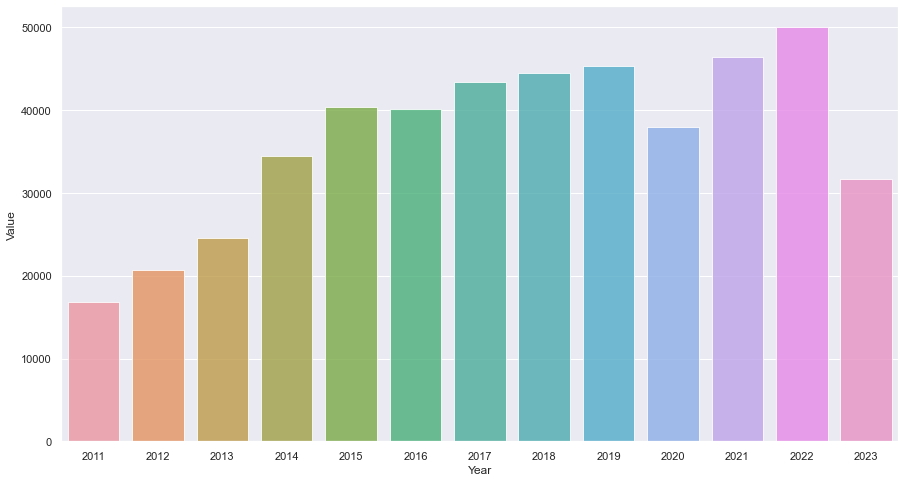

In [22]:
#Barplot visualization was done
fig = plt.figure(figsize=(15,8))
sns.barplot(x="Year", y="Value", data=numberOfHousesDF_yearValue, alpha=0.8);

In [23]:
#Data listed in dataframe
numberOfHousesDF_yearValue.style.background_gradient(axis=0, gmap=numberOfHousesDF_yearValue["Value"], cmap="RdYlBu")

,Year,Value
0,2011,16811.000000
1,2012,20680.000000
2,2013,24568.000000
3,2014,34417.000000
4,2015,40438.000000
5,2016,40150.000000
6,2017,43354.000000
7,2018,44499.000000
8,2019,45276.000000
9,2020,38010.000000


In [24]:
#Maximum and minimum values for housing sales were printed on the screen
maxYearValue = np.amax(numberOfHousesDF_yearValue).apply(np.int64)
minYearValue = np.min(numberOfHousesDF_yearValue).apply(np.int64)
print("The highest number of housing sales were realized in", maxYearValue[0], "as", maxYearValue[1])
print("The lowest number of housing sales were realized in", minYearValue[0], "as", minYearValue[1])

The highest number of housing sales were realized in 2023 as 50025
The lowest number of housing sales were realized in 2011 as 16811


In [25]:
#The data we will use to visualize has been transferred to a new dataframe
numberOfHousesDF_month = firstDF[(firstDF["Statistic Label"] == "Volume of Sales") & (firstDF["Type of Buyer"] == "Household Buyer - All") & (firstDF["Stamp Duty Event"] == "Filings") & (firstDF["Type of Sale"] == "Market")]

jan = numberOfHousesDF.loc[numberOfHousesDF["Month"] == "January"].Value.sum()
feb = numberOfHousesDF.loc[numberOfHousesDF["Month"] == "February"].Value.sum()
mar = numberOfHousesDF.loc[numberOfHousesDF["Month"] == "March"].Value.sum()
apr = numberOfHousesDF.loc[numberOfHousesDF["Month"] == "April"].Value.sum()
may = numberOfHousesDF.loc[numberOfHousesDF["Month"] == "May"].Value.sum()
jun = numberOfHousesDF.loc[numberOfHousesDF["Month"] == "June"].Value.sum()
jul = numberOfHousesDF.loc[numberOfHousesDF["Month"] == "July"].Value.sum()
aug = numberOfHousesDF.loc[numberOfHousesDF["Month"] == "August"].Value.sum()
sep = numberOfHousesDF.loc[numberOfHousesDF["Month"] == "September"].Value.sum()
oct = numberOfHousesDF.loc[numberOfHousesDF["Month"] == "October"].Value.sum()
nov = numberOfHousesDF.loc[numberOfHousesDF["Month"] == "November"].Value.sum()
dec = numberOfHousesDF.loc[numberOfHousesDF["Month"] == "December"].Value.sum()

numberOfHouses = {"Month": ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct", "Nov","Dec"], "Value": [jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec]}
numberOfHousesDF_month = pd.DataFrame(numberOfHouses)

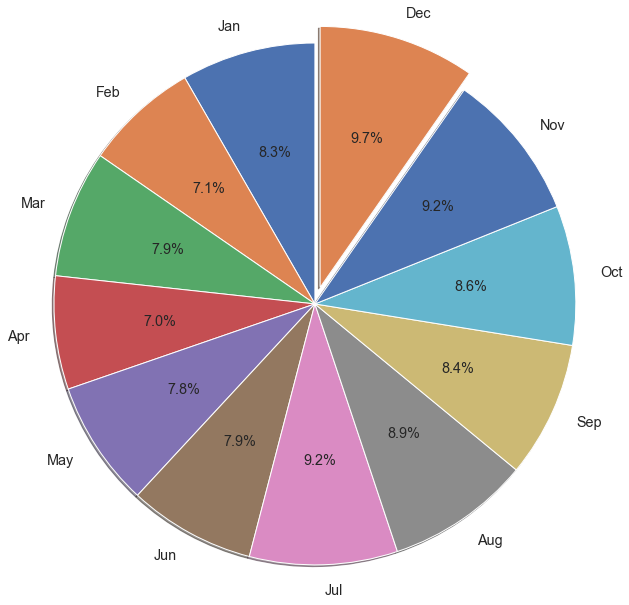

In [26]:
#Pie visualization was done
fig, ax = plt.subplots()
piece = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2)  
ax.pie(x="Value", labels="Month", autopct='%1.1f%%', data=numberOfHousesDF_month, explode=piece, shadow={'ox': -0.01, 'edgecolor': 'blue', 'shade': 1}, startangle=90,  textprops={'size': 'large'}, radius=3)
plt.show()

In [27]:
#Data listed in dataframe
numberOfHousesDF_month.style.background_gradient(axis=0, gmap=numberOfHousesDF_month['Value'], cmap='PuOr')

,Month,Value
0,Jan,41193.000000
1,Feb,35048.000000
2,Mar,39116.000000
3,Apr,34779.000000
4,May,38711.000000
5,Jun,38927.000000
6,Jul,45426.000000
7,Aug,44158.000000
8,Sep,41758.000000
9,Oct,42766.000000


In [28]:
#Data for Ireland's 13 largest counties from 2011-2023
County =  ["Dublin", "Cork", "Galway", "Limerick", "Waterford", "Kildare", "Meath", "Wexford", "Kerry", "Wicklow", "Westmeath", "Carlow", "Kilkenny"]

countOfHousesDF_2023 = firstDF[(firstDF["Statistic Label"] == "Volume of Sales") & (firstDF["Type of Buyer"] == "Household Buyer - All") & (firstDF["Stamp Duty Event"] == "Filings") & (firstDF["Type of Sale"] == "Market") & (firstDF["Year"] == 2023)]
countOfHousesDF_2022 = firstDF[(firstDF["Statistic Label"] == "Volume of Sales") & (firstDF["Type of Buyer"] == "Household Buyer - All") & (firstDF["Stamp Duty Event"] == "Filings") & (firstDF["Type of Sale"] == "Market") & (firstDF["Year"] == 2022)]
countOfHousesDF_2021 = firstDF[(firstDF["Statistic Label"] == "Volume of Sales") & (firstDF["Type of Buyer"] == "Household Buyer - All") & (firstDF["Stamp Duty Event"] == "Filings") & (firstDF["Type of Sale"] == "Market") & (firstDF["Year"] == 2021)]
countOfHousesDF_2020 = firstDF[(firstDF["Statistic Label"] == "Volume of Sales") & (firstDF["Type of Buyer"] == "Household Buyer - All") & (firstDF["Stamp Duty Event"] == "Filings") & (firstDF["Type of Sale"] == "Market") & (firstDF["Year"] == 2020)]
countOfHousesDF_2019 = firstDF[(firstDF["Statistic Label"] == "Volume of Sales") & (firstDF["Type of Buyer"] == "Household Buyer - All") & (firstDF["Stamp Duty Event"] == "Filings") & (firstDF["Type of Sale"] == "Market") & (firstDF["Year"] == 2019)]
countOfHousesDF_2018 = firstDF[(firstDF["Statistic Label"] == "Volume of Sales") & (firstDF["Type of Buyer"] == "Household Buyer - All") & (firstDF["Stamp Duty Event"] == "Filings") & (firstDF["Type of Sale"] == "Market") & (firstDF["Year"] == 2018)]
countOfHousesDF_2017 = firstDF[(firstDF["Statistic Label"] == "Volume of Sales") & (firstDF["Type of Buyer"] == "Household Buyer - All") & (firstDF["Stamp Duty Event"] == "Filings") & (firstDF["Type of Sale"] == "Market") & (firstDF["Year"] == 2017)]
countOfHousesDF_2016 = firstDF[(firstDF["Statistic Label"] == "Volume of Sales") & (firstDF["Type of Buyer"] == "Household Buyer - All") & (firstDF["Stamp Duty Event"] == "Filings") & (firstDF["Type of Sale"] == "Market") & (firstDF["Year"] == 2016)]
countOfHousesDF_2015 = firstDF[(firstDF["Statistic Label"] == "Volume of Sales") & (firstDF["Type of Buyer"] == "Household Buyer - All") & (firstDF["Stamp Duty Event"] == "Filings") & (firstDF["Type of Sale"] == "Market") & (firstDF["Year"] == 2015)]
countOfHousesDF_2014 = firstDF[(firstDF["Statistic Label"] == "Volume of Sales") & (firstDF["Type of Buyer"] == "Household Buyer - All") & (firstDF["Stamp Duty Event"] == "Filings") & (firstDF["Type of Sale"] == "Market") & (firstDF["Year"] == 2014)]
countOfHousesDF_2013 = firstDF[(firstDF["Statistic Label"] == "Volume of Sales") & (firstDF["Type of Buyer"] == "Household Buyer - All") & (firstDF["Stamp Duty Event"] == "Filings") & (firstDF["Type of Sale"] == "Market") & (firstDF["Year"] == 2013)]
countOfHousesDF_2012 = firstDF[(firstDF["Statistic Label"] == "Volume of Sales") & (firstDF["Type of Buyer"] == "Household Buyer - All") & (firstDF["Stamp Duty Event"] == "Filings") & (firstDF["Type of Sale"] == "Market") & (firstDF["Year"] == 2012)]
countOfHousesDF_2011 = firstDF[(firstDF["Statistic Label"] == "Volume of Sales") & (firstDF["Type of Buyer"] == "Household Buyer - All") & (firstDF["Stamp Duty Event"] == "Filings") & (firstDF["Type of Sale"] == "Market") & (firstDF["Year"] == 2011)]

values = [[] for _ in range(13)]  

for county in County:
    values[0].append(countOfHousesDF_2023.loc[countOfHousesDF_2023["County"] == county].Value.sum())
    values[1].append(countOfHousesDF_2022.loc[countOfHousesDF_2022["County"] == county].Value.sum())
    values[2].append(countOfHousesDF_2021.loc[countOfHousesDF_2021["County"] == county].Value.sum())
    values[3].append(countOfHousesDF_2020.loc[countOfHousesDF_2020["County"] == county].Value.sum())
    values[4].append(countOfHousesDF_2019.loc[countOfHousesDF_2019["County"] == county].Value.sum())
    values[5].append(countOfHousesDF_2018.loc[countOfHousesDF_2018["County"] == county].Value.sum())
    values[6].append(countOfHousesDF_2017.loc[countOfHousesDF_2017["County"] == county].Value.sum())
    values[7].append(countOfHousesDF_2016.loc[countOfHousesDF_2016["County"] == county].Value.sum())
    values[8].append(countOfHousesDF_2015.loc[countOfHousesDF_2015["County"] == county].Value.sum())
    values[9].append(countOfHousesDF_2014.loc[countOfHousesDF_2014["County"] == county].Value.sum())
    values[10].append(countOfHousesDF_2013.loc[countOfHousesDF_2013["County"] == county].Value.sum())
    values[11].append(countOfHousesDF_2012.loc[countOfHousesDF_2012["County"] == county].Value.sum())
    values[12].append(countOfHousesDF_2011.loc[countOfHousesDF_2011["County"] == county].Value.sum())
    
countOfHouses = {"County": ["Dublin", "Cork", "Galway", "Limerick", "Waterford", "Kildare", "Meath", "Wexford", "Kerry", "Wicklow", "Westmeath", "Carlow", "Kilkenny"], 
                 "2023": [values[0][0], values[1][0], values[2][0], values[3][0], values[4][0], values[5][0], values[6][0], values[7][0], values[8][0], values[9][0], values[10][0], values[11][0], values[12][0]],
                "2022": [values[0][1], values[1][1], values[2][1], values[3][1], values[4][1], values[5][1], values[6][1], values[7][1], values[8][1], values[9][1], values[10][1], values[11][1], values[12][1]],
                "2021": [values[0][2], values[1][2], values[2][2], values[3][2], values[4][2], values[5][2], values[6][2], values[7][2], values[8][2], values[9][2], values[10][2], values[11][2], values[12][2]],
                "2020": [values[0][3], values[1][3], values[2][3], values[3][3], values[4][3], values[5][3], values[6][3], values[7][3], values[8][3], values[9][3], values[10][3], values[11][3], values[12][3]],
                "2019": [values[0][4], values[1][4], values[2][4], values[3][4], values[4][4], values[5][4], values[6][4], values[7][4], values[8][4], values[9][4], values[10][4], values[11][4], values[12][4]],
                "2018": [values[0][5], values[1][5], values[2][5], values[3][5], values[4][5], values[5][5], values[6][5], values[7][5], values[8][5], values[9][5], values[10][5], values[11][5], values[12][5]],
                "2017": [values[0][6], values[1][6], values[2][6], values[3][6], values[4][6], values[5][6], values[6][6], values[7][6], values[8][6], values[9][6], values[10][6], values[11][6], values[12][6]],
                "2016": [values[0][7], values[1][7], values[2][7], values[3][7], values[4][7], values[5][7], values[6][7], values[7][7], values[8][7], values[9][7], values[10][7], values[11][7], values[12][7]],
                "2015": [values[0][8], values[1][8], values[2][8], values[3][8], values[4][8], values[5][8], values[6][8], values[7][8], values[8][8], values[9][8], values[10][8], values[11][8], values[12][8]],
                "2014": [values[0][9], values[1][9], values[2][9], values[3][9], values[4][9], values[5][9], values[6][9], values[7][9], values[8][9], values[9][9], values[10][9], values[11][9], values[12][9]],
                "2013": [values[0][10], values[1][10], values[2][10], values[3][10], values[4][10], values[5][10], values[6][10], values[7][10], values[8][10], values[9][10], values[10][10], values[11][10], values[12][10]],
                "2012": [values[0][11], values[1][11], values[2][11], values[3][11], values[4][11], values[5][11], values[6][11], values[7][11], values[8][11], values[9][11], values[10][11], values[11][11], values[12][11]],
                "2011": [values[0][12], values[1][12], values[2][12], values[3][12], values[4][12], values[5][12], values[6][12], values[7][12], values[8][12], values[9][12], values[10][12], values[11][12], values[12][12]]}
    
countOfHousesDF_year = pd.DataFrame(countOfHouses)

In [29]:
#Data listed in dataframe
countOfHousesDF_year.style.background_gradient(axis=0, gmap=countOfHousesDF_year["2023"], cmap="pink")

,County,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,Dublin,9449.000000,3571.000000,1483.000000,1113.000000,856.000000,2206.000000,1491.000000,1193.000000,734.000000,1111.000000,606.000000,319.000000,478.000000
1,Cork,14643.000000,5339.000000,2224.000000,1806.000000,1418.000000,3329.000000,2454.000000,1870.000000,1334.000000,1823.000000,961.000000,524.000000,797.000000
2,Galway,13284.000000,5186.000000,2159.000000,1655.000000,1304.000000,2761.000000,2218.000000,1709.000000,1252.000000,1680.000000,873.000000,476.000000,736.000000
3,Limerick,11305.000000,4184.000000,1782.000000,1388.000000,1108.000000,2252.000000,1947.000000,1377.000000,1075.000000,1375.000000,716.000000,368.000000,548.000000
4,Waterford,14521.000000,4988.000000,2069.000000,1751.000000,1225.000000,2517.000000,2297.000000,1509.000000,1196.000000,1634.000000,808.000000,443.000000,638.000000
5,Kildare,14630.000000,4770.000000,2083.000000,1680.000000,1225.000000,2401.000000,2175.000000,1417.000000,1236.000000,1365.000000,841.000000,471.000000,635.000000
6,Meath,14163.000000,4791.000000,2085.000000,1668.000000,1132.000000,2236.000000,1997.000000,1396.000000,1238.000000,1447.000000,806.000000,416.000000,606.000000
7,Wexford,12818.000000,4471.000000,1961.000000,1508.000000,1186.000000,1894.000000,1437.000000,1342.000000,1242.000000,1274.000000,779.000000,426.000000,577.000000
8,Kerry,12311.000000,4618.000000,2257.000000,1600.000000,1129.000000,2029.000000,1512.000000,1433.000000,1241.000000,1190.000000,835.000000,430.000000,605.000000
9,Wicklow,11078.000000,3842.000000,1852.000000,1229.000000,893.000000,1621.000000,1343.000000,1250.000000,961.000000,1134.000000,718.000000,360.000000,546.000000


In [30]:
#The total number of sales in 2023 was looked at
countOfHousesDF_year["2023"] = countOfHousesDF_year["2023"].apply(np.int64)
totalSales2023 = countOfHousesDF_year["2023"].sum()
totalSales2023

149557

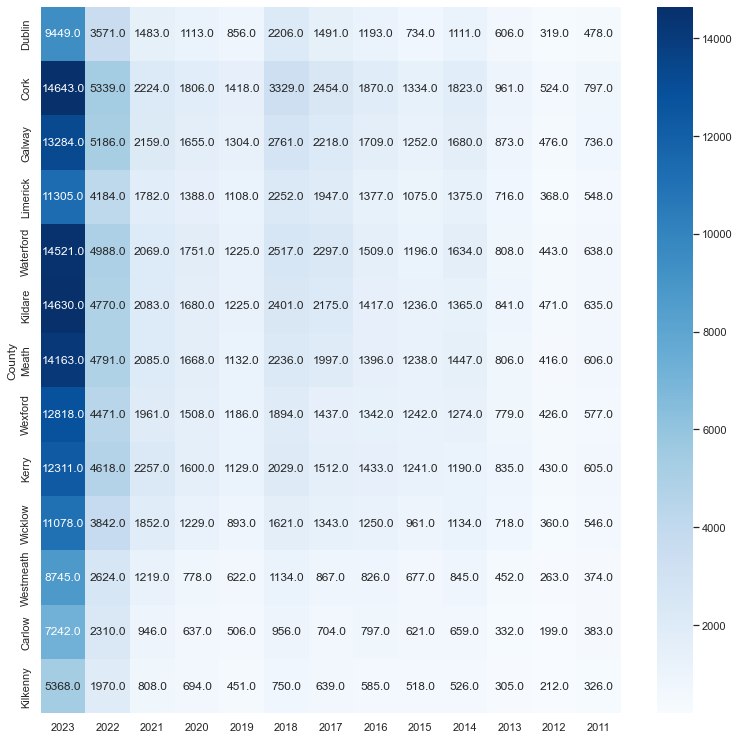

In [31]:
#Heatmap visualization was done
plt.figure(figsize=(13, 13))
sns.heatmap(data=countOfHousesDF_year.set_index("County"), annot=True, cmap="Blues", fmt="")
plt.show()

In [32]:
#Median mean and variance printed to screen
median(numberOfHousesDF_month["Value"])
mean(numberOfHousesDF_month["Value"])
variance(numberOfHousesDF_month["Value"])
numberOfHousesDF_month

Median: 41475.5
Mean: 41303.583333333336
Variance: 15938656.57638889


,Month,Value
0,Jan,41193.0
1,Feb,35048.0
2,Mar,39116.0
3,Apr,34779.0
4,May,38711.0
5,Jun,38927.0
6,Jul,45426.0
7,Aug,44158.0
8,Sep,41758.0
9,Oct,42766.0


In [43]:
#Above Average Sales has been created and values below the average are labeled as 0 and those above the average are labeled as 1
numberOfHousesDF_month["Above Average Sales"] = 0
for i in range(12):
    if numberOfHousesDF_month["Value"][i] > np.mean(numberOfHousesDF_month["Value"]):
        numberOfHousesDF_month["Above Average Sales"][i] = "1"
    else:
        numberOfHousesDF_month["Above Average Sales"][i] = "0"
        
numberOfHousesDF_month

,Month,Value,Above Average Sales
0,Jan,41193.0,0
1,Feb,35048.0,0
2,Mar,39116.0,0
3,Apr,34779.0,0
4,May,38711.0,0
5,Jun,38927.0,0
6,Jul,45426.0,1
7,Aug,44158.0,1
8,Sep,41758.0,1
9,Oct,42766.0,1


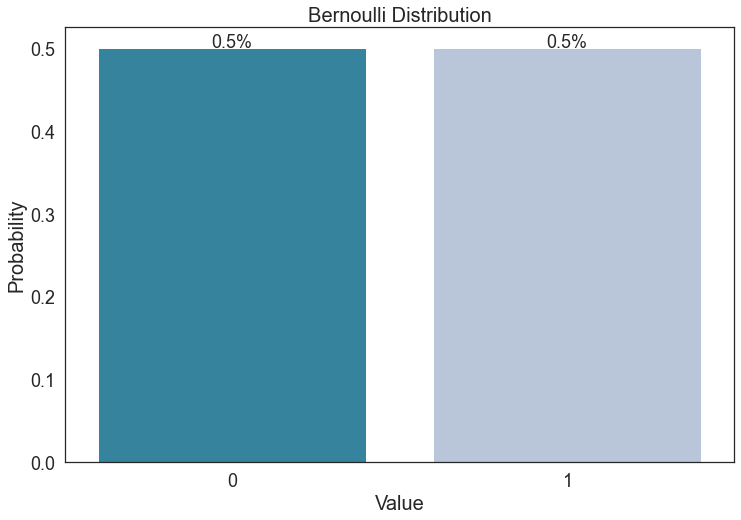

In [44]:
sns.set_style('white')
fig,ax=plt.subplots(figsize=(12,8))
probabilities=numberOfHousesDF_month['Above Average Sales'].value_counts(normalize=True)
ax=sns.barplot(x=probabilities.index, y=probabilities.values, palette='PuBuGn_r')
patches=ax.patches
for i in range(len(patches)):
    x=patches[i].get_x()+patches[i].get_width()/2
    y=patches[i].get_height()+0.001
    ax.annotate('{:.1f}%'.format(y),(x,y),ha='center',fontsize=18)
label_graph(18,'Value','Probability','Bernoulli Distribution', 20)

[0.01164633 0.06278891]


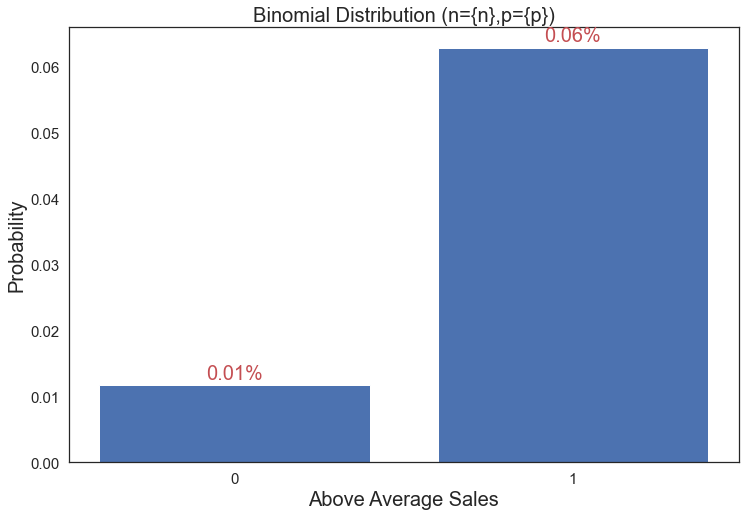

In [45]:
"""#Binomial distribution
aboveAvarageSales=numberOfHousesDF_month[numberOfHousesDF_month['Above Average Sales']== 1]
aboveAvarageSales['Value'].value_counts(normalize=True)
n=12
p=0.31
x=np.arange(0,2)
fig,ax=plt.subplots(figsize=(12,8))
pmf=stats.binom.pmf(x,n,p)
pps=plt.bar(x,pmf)
print(pmf)
for w in pps:
    height=w.get_height()
    ax.text(x=w.get_x()+w.get_width()/2,y=height+0.001,
           s='{}%'.format(round(height,2)),ha='center',fontsize=20,color='r')
plt.locator_params(integer=True)
label_graph(15,'Above Average Sales', 'Probability', 'Binomial Distribution (n={n},p={p})',20)"""

In [ ]:
numberOfHousesDF

In [ ]:
numberOfHousesDF = firstDF[(firstDF["Statistic Label"] == "Value of Sales")]
